# Arabic character classification with detection

here we are Implementing a CNN model for the classification and implementing a detection algorithm at the end.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sn

import keras
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



In [3]:
arabic_characters = ['alef', 'beh', 'teh', 'theh', 'jeem', 'hah', 'khah', 'dal', 'thal',
                    'reh', 'zain', 'seen', 'sheen', 'sad', 'dad', 'tah', 'zah', 'ain',
                    'ghain', 'feh', 'qaf', 'kaf', 'lam', 'meem', 'noon', 'heh', 'waw', 'yeh']


In [3]:
# loading the dataset


x_train = pd.read_csv("csvTrainImages 13440x1024.csv",header=None).to_numpy()
y_train = pd.read_csv("csvTrainLabel 13440x1.csv",header=None).to_numpy()-1 

x_test = pd.read_csv("csvTestImages 3360x1024.csv",header=None).to_numpy()
y_test = pd.read_csv("csvTestLabel 3360x1.csv",header=None).to_numpy()-1

print("x_train.shape =", x_train.shape, "\ny_train.shape =", y_train.shape, "\nx_test.shape =", x_test.shape, "\ny_test.shape =", y_test.shape)

x_train.shape = (13440, 1024) 
y_train.shape = (13440, 1) 
x_test.shape = (3360, 1024) 
y_test.shape = (3360, 1)


(13440, 32, 32, 1) (3360, 32, 32, 1)


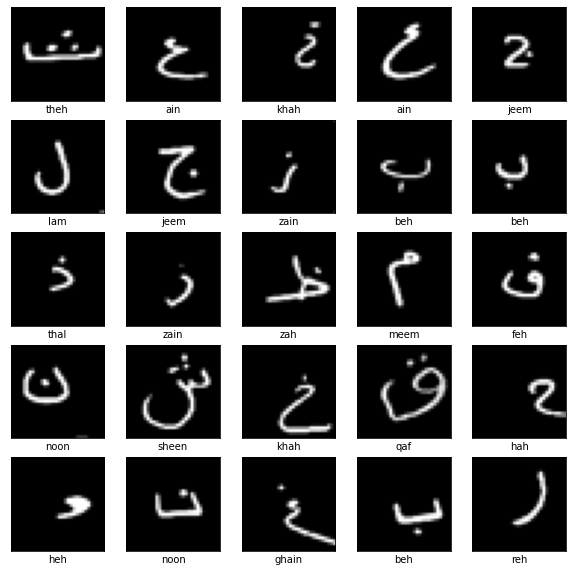

In [4]:
x_train = x_train.reshape(-1,32,32,1)
x_test = x_test.reshape(-1,32,32,1)

x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape, x_test.shape)

ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32,32).T,"gray")
    plt.xlabel(arabic_characters[int(y_train[ra[i]][0])])
plt.show()


In [5]:
# Converting the class vector in integers to binary class matrix
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape, y_test.shape)
for i in zip(y_train[0], arabic_characters):
    print(i)


(13440, 28) (3360, 28)
(1.0, 'alef')
(0.0, 'beh')
(0.0, 'teh')
(0.0, 'theh')
(0.0, 'jeem')
(0.0, 'hah')
(0.0, 'khah')
(0.0, 'dal')
(0.0, 'thal')
(0.0, 'reh')
(0.0, 'zain')
(0.0, 'seen')
(0.0, 'sheen')
(0.0, 'sad')
(0.0, 'dad')
(0.0, 'tah')
(0.0, 'zah')
(0.0, 'ain')
(0.0, 'ghain')
(0.0, 'feh')
(0.0, 'qaf')
(0.0, 'kaf')
(0.0, 'lam')
(0.0, 'meem')
(0.0, 'noon')
(0.0, 'heh')
(0.0, 'waw')
(0.0, 'yeh')


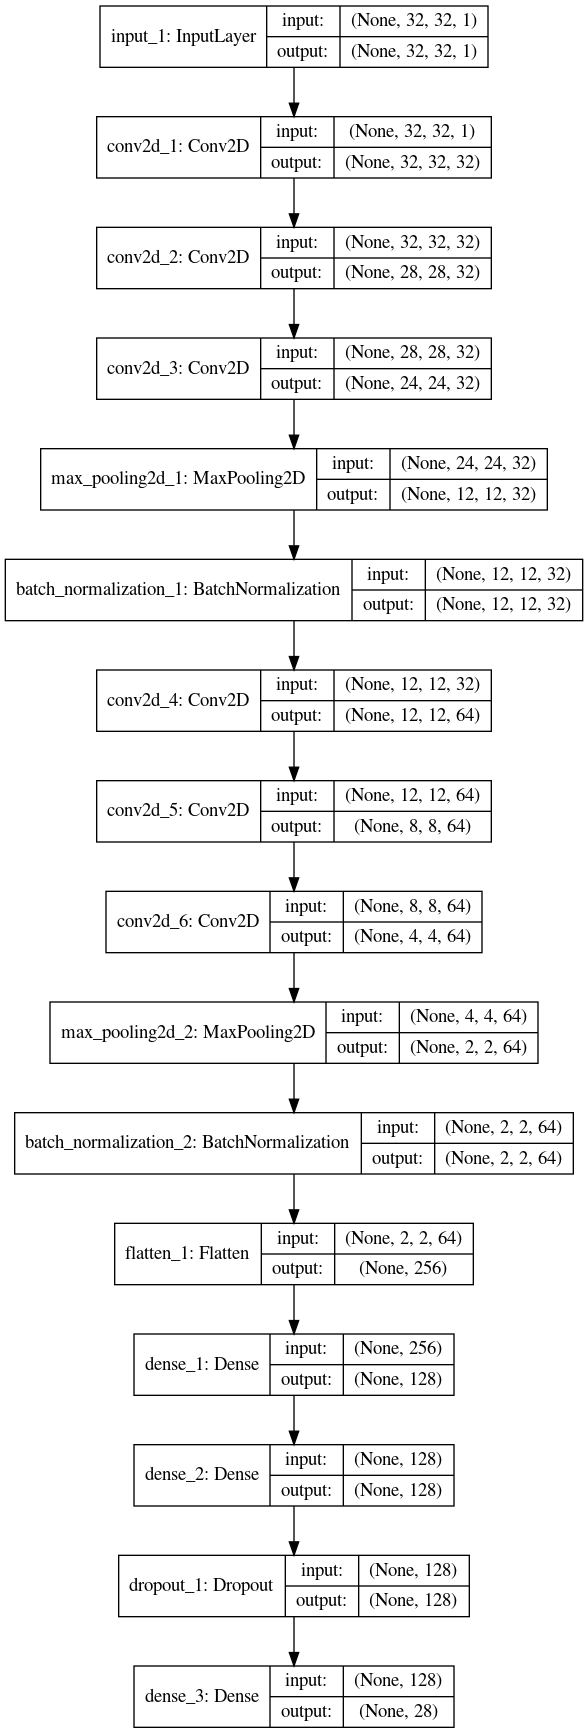

In [6]:
def get_model():
    In = Input(shape=(32,32,1))
    x = Conv2D(32, (5,5), padding="same", activation="relu")(In)
    x = Conv2D(32, (5,5), activation="relu")(x)
    x = Conv2D(32, (5,5), activation="relu")(x)
    x = MaxPooling2D((2,2))(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(64, (5,5), padding="same", activation="relu")(x)
    x = Conv2D(64, (5,5), activation="relu")(x)
    x = Conv2D(64, (5,5), activation="relu")(x)
    x = MaxPooling2D((2,2))(x)
    x = BatchNormalization()(x)
    
    x = Flatten()(x)
    x = Dense(128, activation="relu")(x)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.4)(x)
    
    Out = Dense(28, activation="softmax")(x)
    
    model = Model(In, Out)
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

model = get_model()
keras.utils.vis_utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [7]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [8]:
batch_size = 64
epochs = 200

train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)


In [9]:
model_checkpoint_callback = ModelCheckpoint(
    filepath="best.hdf5",
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')


history = model.fit_generator(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = x_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = x_test.shape[0] // batch_size,
                              callbacks=[model_checkpoint_callback])





Epoch 1/200
210/210 [==============================] - 11s 54ms/step - loss: 2.1938 - accuracy: 0.3158 - val_loss: 7.8295 - val_accuracy: 0.0358

Epoch 00001: val_accuracy improved from -inf to 0.03576, saving model to best.hdf5
Epoch 2/200
210/210 [==============================] - 7s 34ms/step - loss: 0.9698 - accuracy: 0.6656 - val_loss: 2.9451 - val_accuracy: 0.2473

Epoch 00002: val_accuracy improved from 0.03576 to 0.24727, saving model to best.hdf5
Epoch 3/200
210/210 [==============================] - 7s 33ms/step - loss: 0.5889 - accuracy: 0.8051 - val_loss: 0.9514 - val_accuracy: 0.6799

Epoch 00003: val_accuracy improved from 0.24727 to 0.67992, saving model to best.hdf5
Epoch 4/200
210/210 [==============================] - 6s 31ms/step - loss: 0.4295 - accuracy: 0.8608 - val_loss: 0.8780 - val_accuracy: 0.7764

Epoch 00004: val_accuracy improved from 0.67992 to 0.77640, saving model to best.hdf5
Epoch 5/200
210/210 [==============================] - 6s 31ms/step - loss: 0.

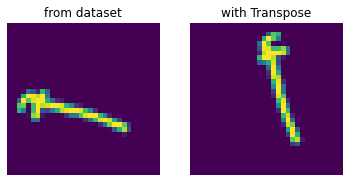

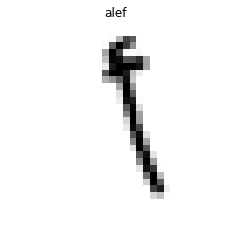

In [10]:
# we need to transpose the image for visualization
# since for training there is no problem we gave the data as it was
plt.figure()
plt.subplot(1,2,1)
plt.imshow(x_test[0].reshape(32,32))
plt.axis("off")
plt.title("from dataset")
plt.subplot(1,2,2)
plt.imshow(x_test[0].reshape(32,32).T)
plt.axis("off")
plt.title("with Transpose")
plt.show()

pred = model.predict([[x_test[0]]])
plt.imshow(x_test[0].reshape(32,32).T, "binary")
plt.title(arabic_characters[np.argmax(pred)])
plt.axis("OFF")
plt.show()

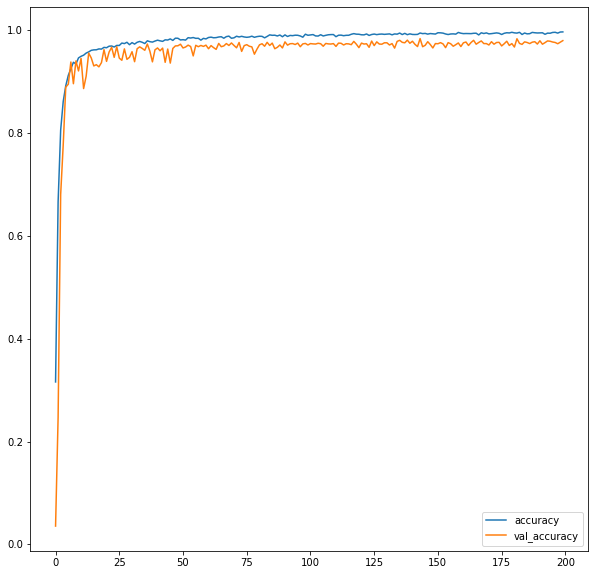

In [11]:
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])
plt.show()

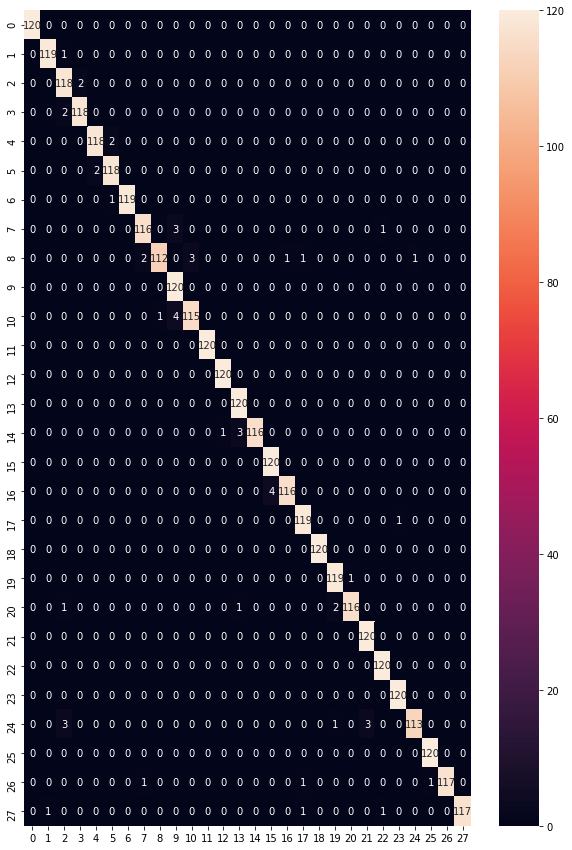

In [12]:

y_preds = model.predict(x_test)
y_pred_classes = np.argmax(y_preds, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,15))
sn.heatmap(cm, annot=True, fmt="d")

In [13]:
import cv2
def get_sides(length):
    if length%2==0:
        return length//2,length//2
    else:
        return (length-1)//2,1+(length-1)//2
    
    
def preprocess(character):
    if len(character.shape)<2:
        character = cv2.cvtColor(word, cv2.COLOR_BGR2GRAY)

    (wt, ht) = (32,32)
    (h, w) = character.shape
    fx = w / wt
    fy = h / ht
    f = max(fx, fy)
    newSize = (max(min(wt, int(w / f)), 1), max(min(ht, int(h / f)), 1)) 
    character = cv2.resize(character, newSize)

    if character.shape[0] < 32:
        add_zeros_up = np.zeros((get_sides(32-character.shape[0])[0], character.shape[1]))
        add_zeros_down = np.zeros((get_sides(32-character.shape[0])[1], character.shape[1]))
        character = np.concatenate((add_zeros_up,character))
        character = np.concatenate((character, add_zeros_down))

    if character.shape[1] < 32:
        add_zeros_left = np.zeros((32, get_sides(32-character.shape[1])[0]))
        add_zeros_right = np.zeros((32, get_sides(32-character.shape[1])[1]))
        
        character = np.concatenate((add_zeros_left,character), axis=1)
        character = np.concatenate((character, add_zeros_right), axis=1)


    character= character.T/255.0
    character = np.expand_dims(character , axis = 2)
    return character

def get_characters(img,kv=5):
    gray = img.copy()

    kernel = np.ones((kv,kv),dtype=np.uint8)
    if len(img.shape)==3:
        gray = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
        
    _, thresh = cv2.threshold(gray,127,255, cv2.THRESH_BINARY_INV)
    imgdilation = cv2.dilate(thresh,kernel, iterations=1)
    ctrs, _= cv2.findContours(imgdilation.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs = sorted(ctrs,key = lambda ctr: cv2.boundingRect(ctr)[0])
    sorted_ctrs = sorted_ctrs[::-1]
    characters=[]
    for ctr in sorted_ctrs:
        x, y, w, h = cv2.boundingRect(ctr)

        acharacter = 255-np.array(img[y:y+h,x:x+w])
        acharacter = preprocess(acharacter)
        characters.append(acharacter)
    
    return characters,sorted_ctrs



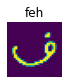

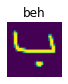

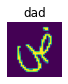

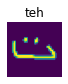

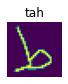

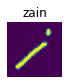

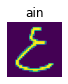

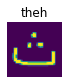

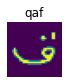

In [14]:
characters = get_characters(cv2.imread('C:/Users/hp/for-detatction/pages/t2.png',cv2.IMREAD_GRAYSCALE),30)[0]
characters=np.array(characters).reshape(-1,32,32,1)
preds = model.predict(characters)
for img, pred in zip(characters, preds):
    plt.figure(figsize=(1,1))
    plt.imshow(img.reshape(32,32).T)
    plt.title(arabic_characters[pred.argmax()])
    plt.axis('off')
    plt.show()

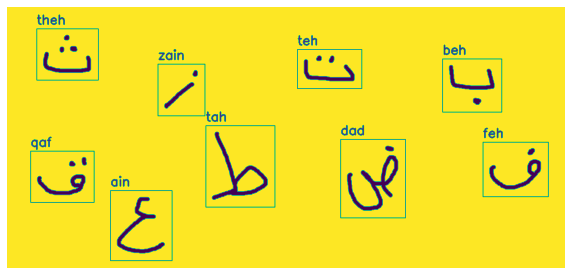

In [16]:
page = cv2.imread('C:/Users/hp/for-detection/pages/t2.png',cv2.IMREAD_GRAYSCALE)
characters = get_characters(page,30)[1]
for ctr in characters:
        x, y, w, h = cv2.boundingRect(ctr)

        acharacter = 255-np.array(page[y:y+h,x:x+w])
        acharacter = preprocess(acharacter)
        acharacter = acharacter.reshape(32,32,1)
        pred = model.predict([[acharacter]])
        page = cv2.rectangle(page, (x, y), (x + w, y + h), (36,255,12), 1)
        cv2.putText(page, arabic_characters[np.argmax(pred)], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
plt.figure(figsize=(10,10))
plt.imshow(page)
plt.axis("OFF")
plt.show()


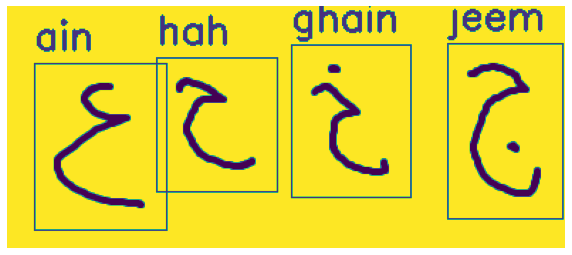

In [17]:
page = cv2.imread('C:\Users\hp\for-detection/pages/t1.png',cv2.IMREAD_GRAYSCALE)
characters = get_characters(page,30)[1]
for ctr in characters:
        x, y, w, h = cv2.boundingRect(ctr)

        acharacter = 255-np.array(page[y:y+h,x:x+w])
        acharacter = preprocess(acharacter)
        acharacter = acharacter.reshape(32,32,1)
        pred = model.predict([[acharacter]])
        page = cv2.rectangle(page, (x, y), (x + w, y + h), (36,255,12), 1)
        cv2.putText(page, arabic_characters[np.argmax(pred)], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
plt.figure(figsize=(10,10))
plt.imshow(page)
plt.axis("OFF")
plt.show()
